# Applying Tensorflow to Fashion MNIST dataset
> A short tutorial on using Tensorflow with Fashion MNIST dataset

- toc: true 
- badges: true
- comments: true
- categories: [tensorflow]
- image: images/cnn_fashion_tensorboard.png

## Library imports

In [1]:
import os
import random
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

import matplotlib.pyplot as plt

# Load the TensorBoard notebook extension
%load_ext tensorboard

## Data loading

[Fashion MNIST dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist) which contains 70,000 grayscale images in 10 categories. Each image in the dataset represents an article of clothing with a 28 x 28 pixels image.The possible clothing articles range from T-shirt/top to Ankle boot.

Tensorflow provides us with a simple way to load the training and test data through the `tf.keras.datasets` module, in this case using the function `tf.keras.datasets.fashion_mnist.load_data()`.

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
#hide_input
print(f'There are {len(train_labels)} images in the training dataset and {len(test_labels)} in the test set')

There are 60000 images in the training dataset and 10000 in the test set


## Data visualization

Let's have a look at the data we have just loaded using a helper functions to plot a grid with randomly selected samples from one of the two datasets (training / test) that we have just loaded.

> Note: the labels in the training and test dataset are values between 0 and 9 whose corresponding description is obtained using the index value in the list `clothing_articles`

In [4]:
clothing_articles = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                     'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_images_grid(images, labels, rows=4, cols=4):
    width = cols * 2
    height = cols * 2    
    fig = plt.figure(figsize=(width, height))
    for i in range(1, rows * cols + 1):
        # get a random index and obtain image and label
        idx = random.randint(0, len(images)-1)
        img = images[idx]
        label = clothing_articles[labels[idx]]
        
        fig.add_subplot(rows, cols, i)
        plt.title(label, {'fontsize': 16, 'color': 'blue'})
        plt.axis('off')
        plt.imshow(img.squeeze(), cmap='gray')
        
    plt.show()        

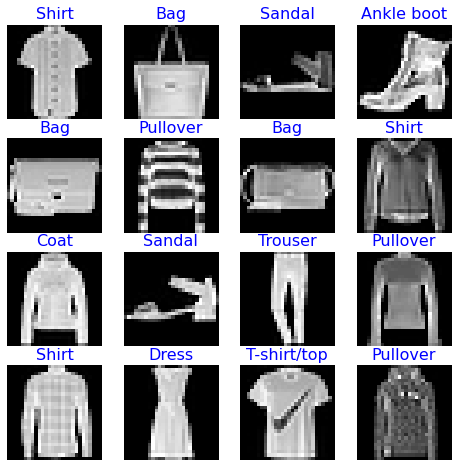

In [5]:
plot_images_grid(train_images, train_labels)

Now, we need to reshape the images in order to add the number of channels. If we check the current shape of train_images:

```python
train_images.shape
(60000, 28, 28)
```

In [6]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

Both the `train_images` and the `train_labels` are values between 0 and 255. In order to improve the neural network training it is usual to normalize those values so the are in the range 0 to 1.

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## CNN model

### Model definition
Let's create a simple CNN model to recognize the images.

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation=tf.nn.relu, input_shape=(28, 28, 1), name='conv_1'),
    MaxPool2D(pool_size=(2,2), name='maxpool_1'),
    Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu, name='conv_2'),
    MaxPool2D(pool_size=(2,2), name='maxpool_2'),
    Flatten(name='flatten'),
    Dense(128, activation=tf.nn.relu, name='dense_1'),
    Dense(10, activation=tf.nn.softmax, name='dense_2')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_1 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 11, 11, 64)        18496     
_________________________________________________________________
maxpool_2 (MaxPooling2D)     (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

Define the optimizer to be used during training, loss and the metrics to be gathered.

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Model training

Let's train the model for 10 epochs.

In [11]:
# Setup logging with Tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [12]:
EPOCHS = 10
model.fit(train_images, 
          train_labels, 
          epochs=EPOCHS, 
          validation_data=(test_images, test_labels),
          callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.6311 - accuracy: 0.7756 - val_loss: 0.3558 - val_accuracy: 0.8710
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3193 - accuracy: 0.8825 - val_loss: 0.3157 - val_accuracy: 0.8864
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2631 - accuracy: 0.9021 - val_loss: 0.2865 - val_accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.2299 - accuracy: 0.9146 - val_loss: 0.2750 - val_accuracy: 0.9013
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1994 - accuracy: 0.9239 - val_loss: 0.2609 - val_accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1753 - accuracy: 0.9336 - val_loss: 0.2849 - val_accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1569 - accuracy: 0.9403 - val_loss: 0.2818 -

We can visualize the training evolution with Tensorboard

`%tensorboard --logdir logs/fit`

![](my_icons/cnn_fashion_tensorboard.PNG)

### Model evaluation

Last but not least, we can evaluate the model against the test data to check the accuracy.

In [17]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.2902 - accuracy: 0.9126


[0.29018083214759827, 0.9125999808311462]